# HR DATA ANALYSIS

### Problem Statement
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

In [1]:
from IPython.display import Image
Image(url= "https://matchr.com/wp-content/uploads/2021/06/HR-Analyst-scaled.jpg")

In [2]:
# import libraries
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# importing files
df = pd.read_csv('HR Data.csv')

# Data Understanding

In [4]:
# show dimension of data sets
df.shape

(1470, 35)

There are 1470 rows and 35 columns in our datasets.

In [5]:
# show columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# first five rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# last five rows
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


Checking the first 5 and last 5 rows of our entire dataset. We can see that our dataset comprises of total **1470 rows and 35 columns.** The column **"Attrition"** is our label that needs to be predicted in assisting the HR professionals to understand what causes attrition in an organization and help them with retention process. Apart from the "Attrition" column right now all the remaining columns are our features that we will be using to generate our prediction. Since our label column is based upon binary classes this becomes a Classification problem!

In [8]:
# obtain the information of each columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can see that currently there are 26 columns that have integer datatype and 9 columns that have object datatype. We will need to treat the object datatype columns so that our machine learning model can understand the data since the acceptance of numerical data is mandatory.

In [9]:
# identify number of unique value in each column.
df.nunique().to_frame("Unique Value")

,Unique Value
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


We are checking the total number of unique values present in each column be it categorical or numerical data.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [11]:
# checking the null value in each columns.
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Luckily we do not have any missing values in any of our columns so we won't have to worry about handling missing data.

# Assignment Goal

1. Data cleansing involves removing unnecessary columns.
2. Giving the columns new names.
3. Eliminating redundant entries.
4. Sanitizing specific columns.
5. Eliminate the dataset's NaN values.
6. Look for a few more changes if necessary

# Data Visualization

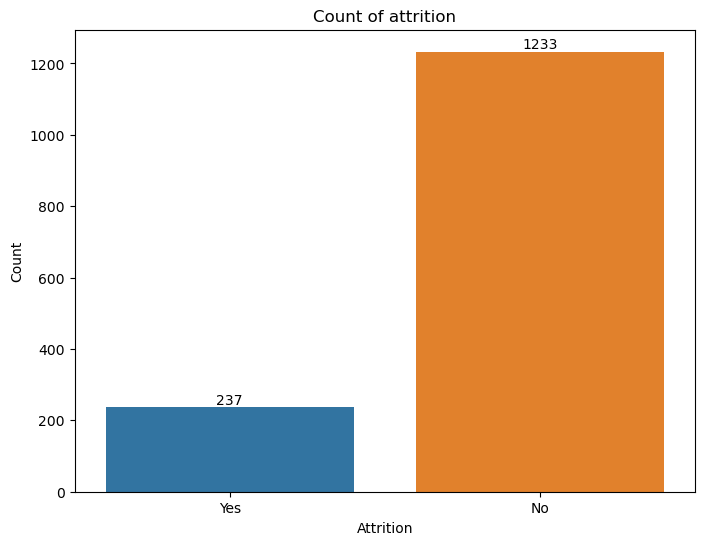

In [12]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Attrition', data=df)
for x in ax.containers:
    ax.bar_label(x)
plt.title("Count of attrition")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

So looking at the above countplot we can see that our target label is quite imbalanced and will needed to be treated for the same.

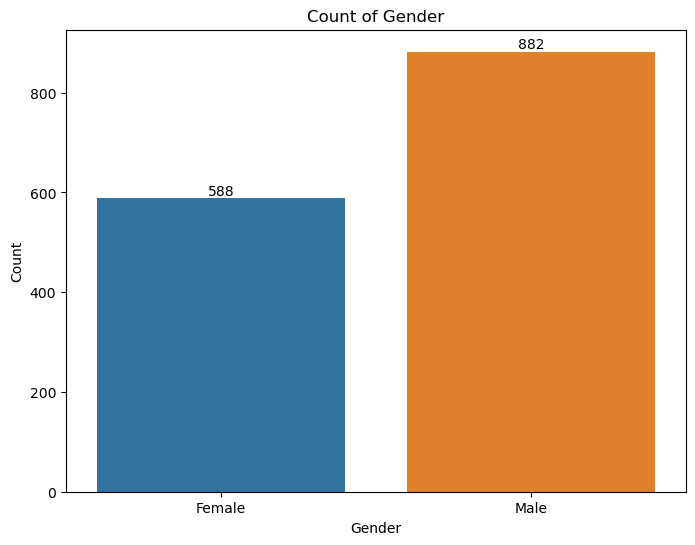

In [13]:
plt.figure(figsize=(8,6))
bx = sns.countplot(x='Gender', data=df)
for x in bx.containers:
    bx.bar_label(x)
plt.title("Count of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In the Gender column we can see that the number of male employees is higher than the female employees. 

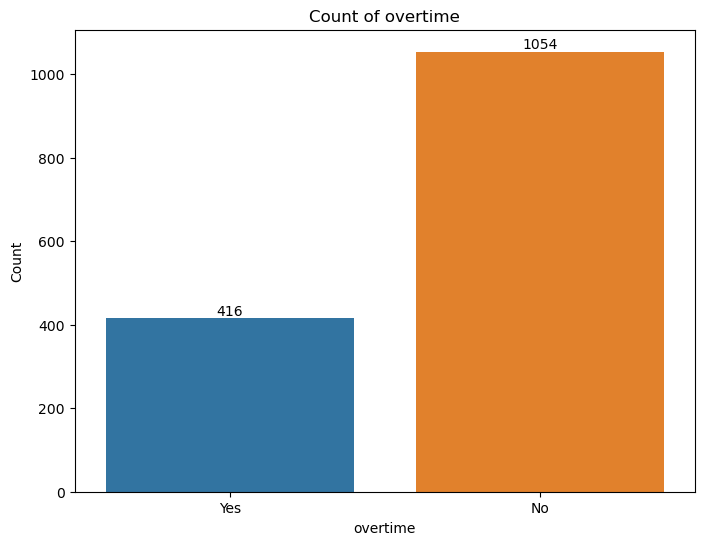

In [14]:
plt.figure(figsize=(8,6))
cx = sns.countplot(x='OverTime', data=df)
for x in cx.containers:
    cx.bar_label(x)
plt.title("Count of overtime")
plt.xlabel("overtime")
plt.ylabel("Count")
plt.show()

The OverTime column shows us the number of employees who do over time and the one's who do not. And it looks like from the above count plot that employees do not prefer doing over time in the company.

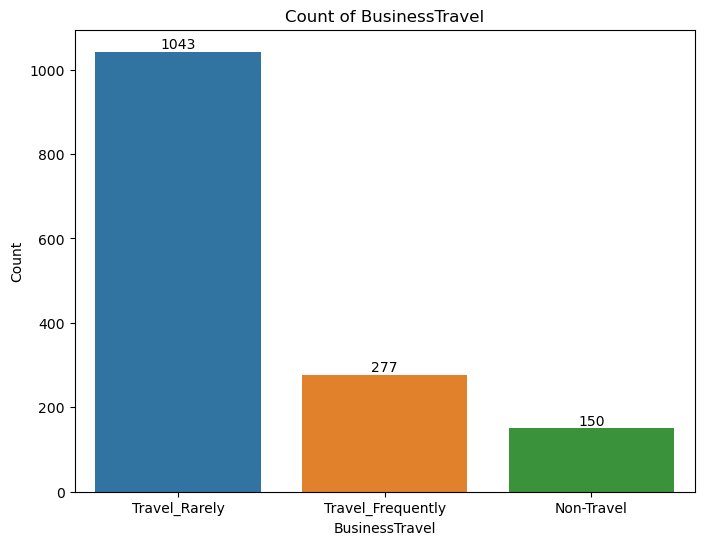

In [15]:
plt.figure(figsize=(8,6))
cx = sns.countplot(x='BusinessTravel', data=df)
for x in cx.containers:
    cx.bar_label(x)
plt.title("Count of BusinessTravel")
plt.xlabel("BusinessTravel")
plt.ylabel("Count")
plt.show()

In the BusinessTravel column we see a majority of number in the Travel_Rarely value while Non_Travel are the least of them.

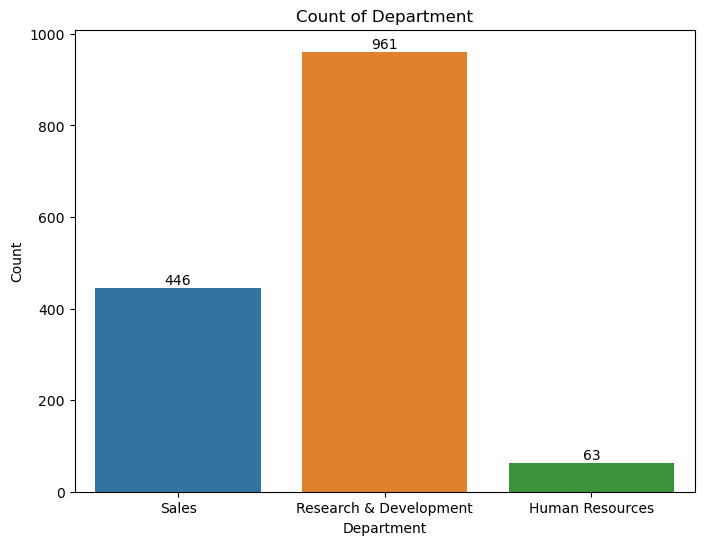

In [16]:
plt.figure(figsize=(8,6))
cx = sns.countplot(x='Department', data=df)
for x in cx.containers:
    cx.bar_label(x)
plt.title("Count of Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

In the Department column we see lots of values for R&D department however the least number of employees are in HR since an organisation would need a limited number of Human Resources team it makes sense for it to have the least value.

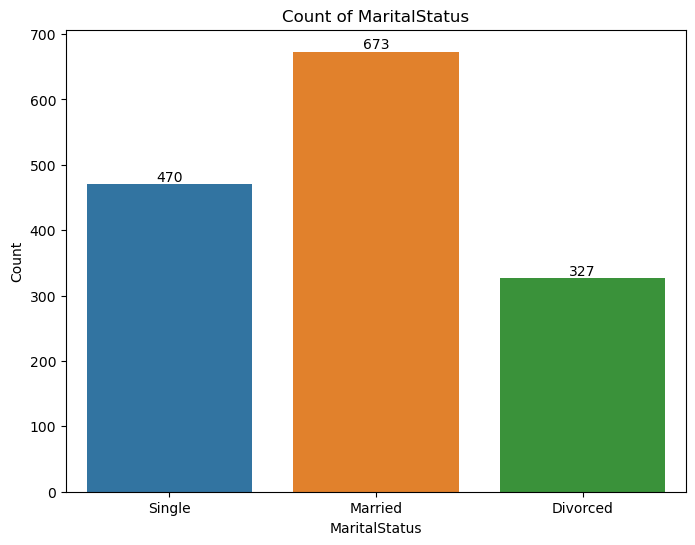

In [17]:
plt.figure(figsize=(8,6))
cx = sns.countplot(x='MaritalStatus', data=df)
for x in cx.containers:
    cx.bar_label(x)
plt.title("Count of MaritalStatus")
plt.xlabel("MaritalStatus")
plt.ylabel("Count")
plt.show()

In the MaritalStatus column plot we can see that the number of married employees is highest and the number of divorced employees is lowest.

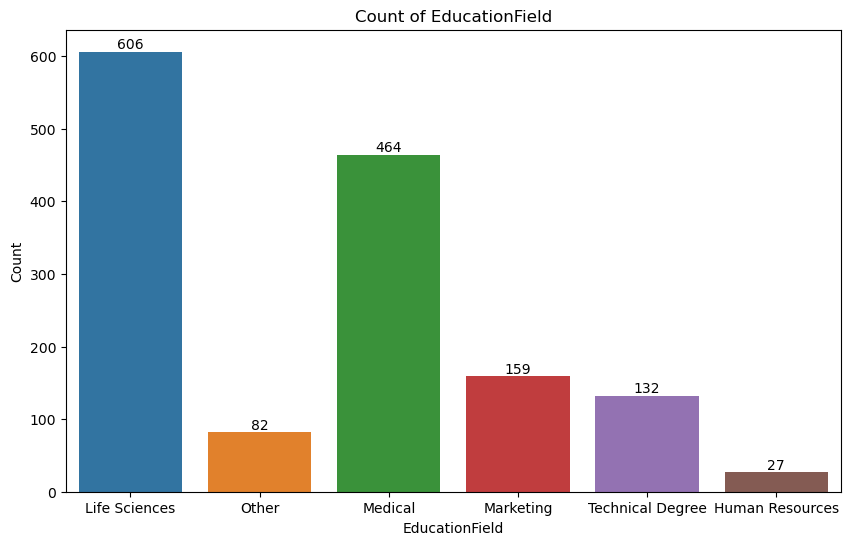

In [18]:
plt.figure(figsize=(10,6))
cx = sns.countplot(x='EducationField', data=df)
for x in cx.containers:
    cx.bar_label(x)
plt.title("Count of EducationField")
plt.xlabel("EducationField")
plt.ylabel("Count")
plt.show()

For the EducationField column we have employees majorly from the Life Sciences educational background and the least from HR since that department needs lesser number of employees to contribute in the organization.

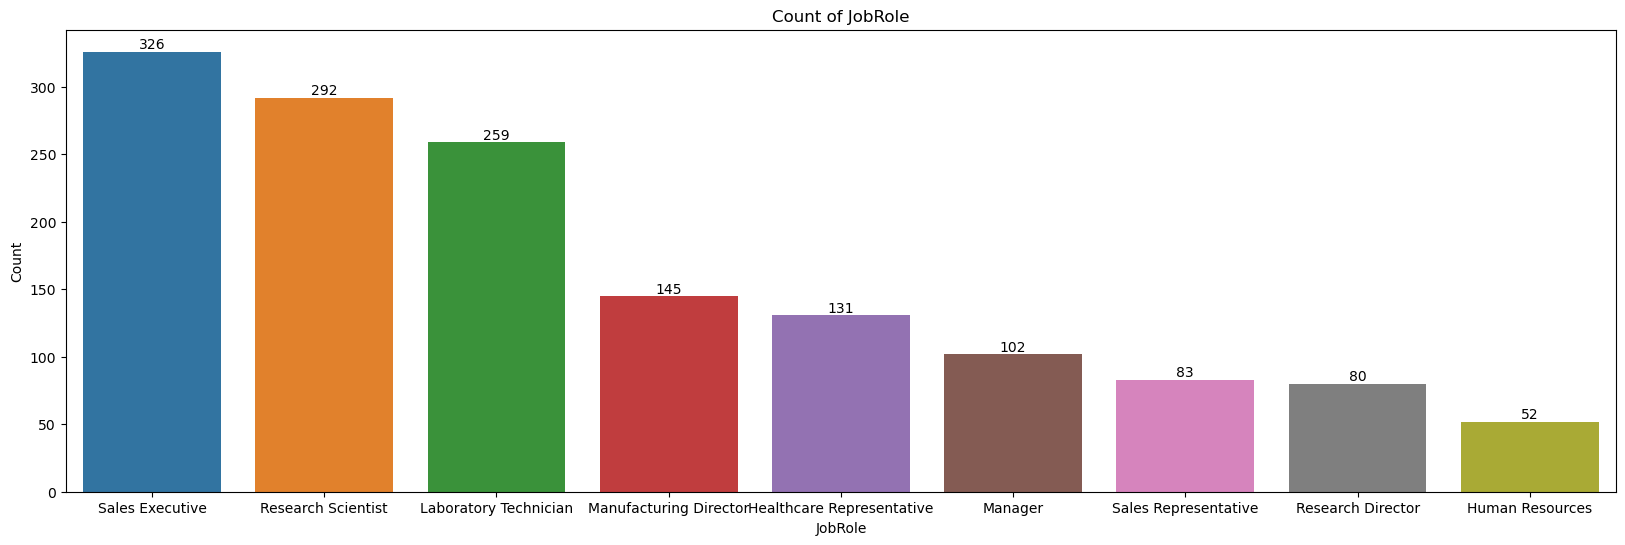

In [19]:
plt.figure(figsize=(20,6))
cx = sns.countplot(x='JobRole', data=df)
for x in cx.containers:
    cx.bar_label(x)
plt.title("Count of JobRole")
plt.xlabel("JobRole")
plt.ylabel("Count")
plt.show()

Pertaining to the JobRole column we can see that the highest number is found in sales executive designation since they are the grass root level employees who are the most productive and handle the business value directly. And as notice in other plots we have the lowest number for HR roles as the employees present in that department are the lowest as well.

# Data preperation

In [20]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)

I am dropping all the unwanted columns after careful observations done above.
- **EmployeeCount** - All the rows in this column are filled with just a single number "1" which cannot provide much information related to attrition of an employee
- **EmployeeNumber** - Since it is just a unique number provided to each employee that has nothing to do with attrition
- **Over18** - This particular column has 1 single value for all the rows therefore it does not add much value considering the attrition of the employees
- **StandardHours** - This column we have single value for all the rows that is "80" hours as a standardized policy so does not make much difference with respect to attrition.

In [21]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
object_datatype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

Here we have a list of all the **8** columns that hold object datatype that will need to be encoded into numerical format before creating our model.

In [22]:
int_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        int_datatype.append(x)
int_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Here we have a list of all the **23** columns that hold integer datatype that will comprise the numerical data part of our ML project.

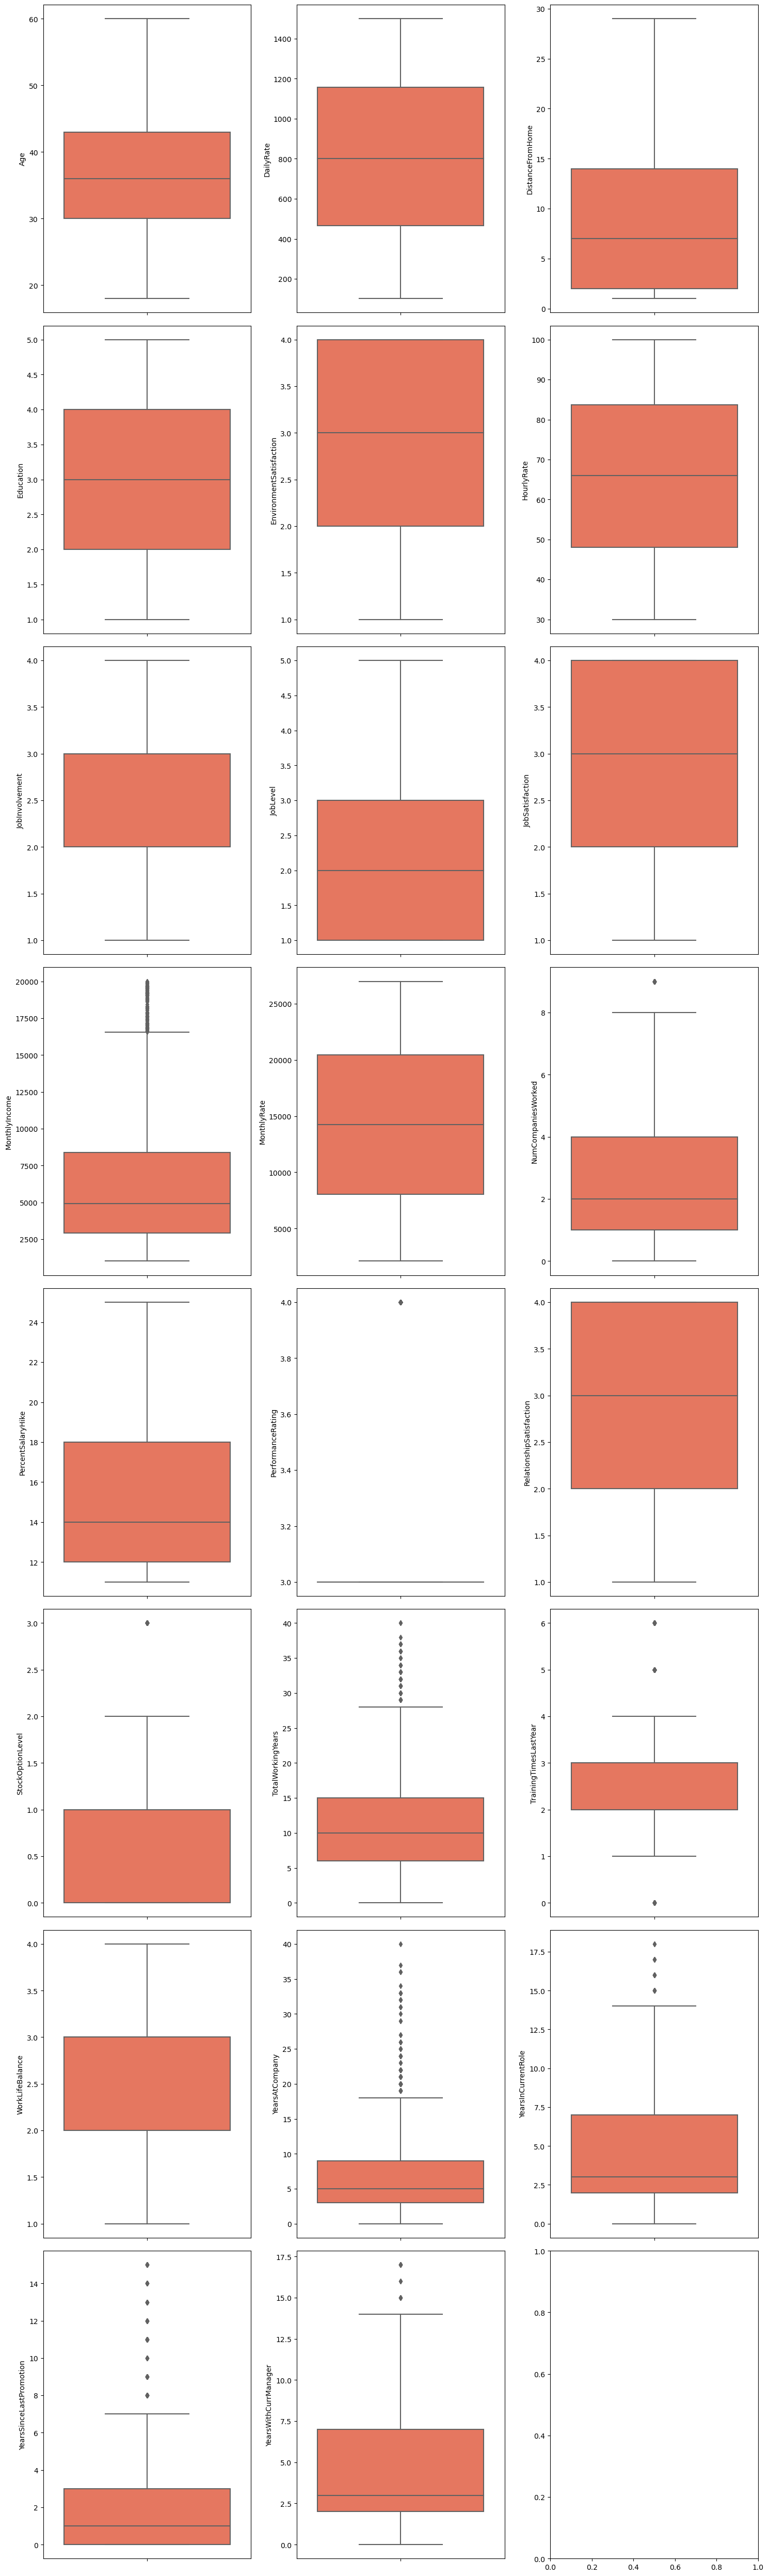

In [23]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[int_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Reds")
    index += 1
plt.tight_layout()
plt.show()

We have created a box plot visual for all our integer datatype columns to check for outliers. We do see some of the columns where there are presence of outliers and we will need to treat it accordingly.

- MonthlyIncome
- NumCompaniesWorked
- PerformanceRating
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

All the above columns show visible outlier details.

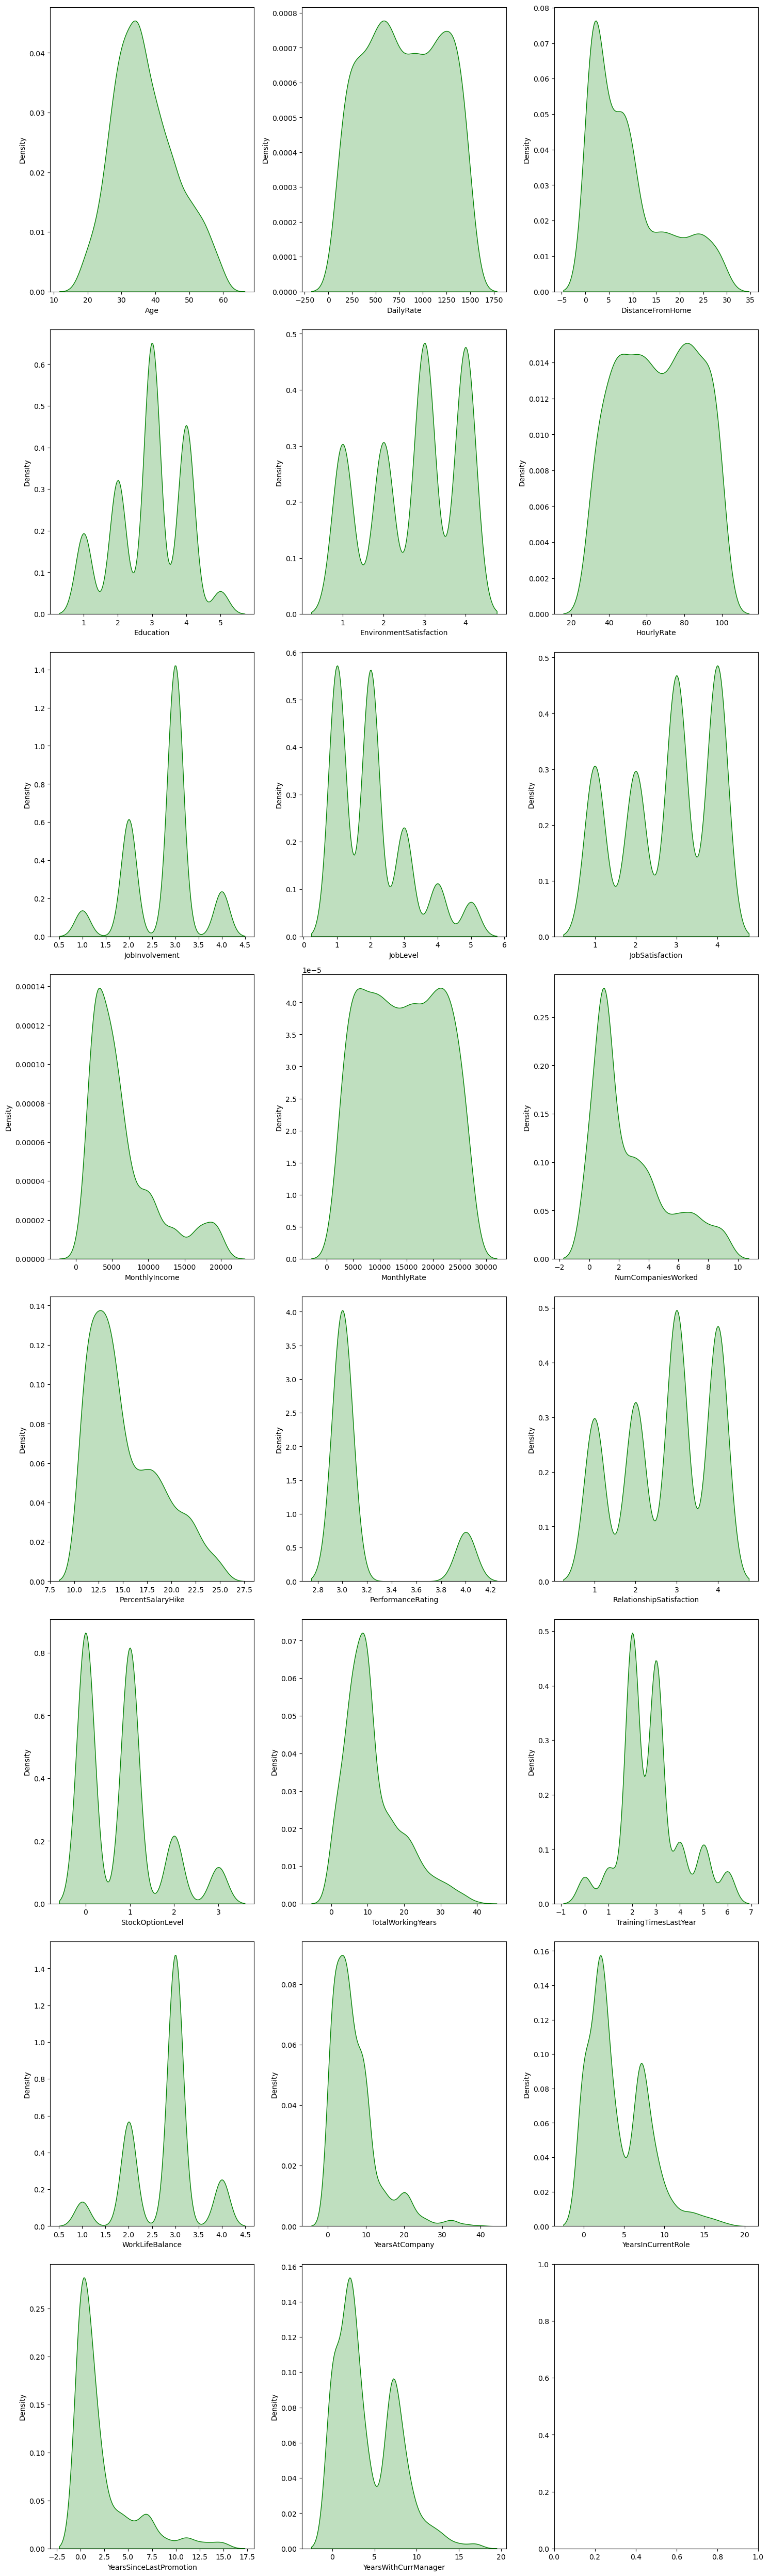

In [24]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[int_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout()
plt.show()

With the help of above distribution plot we are able to see some skewness present in few columns that will need to be handled as well.

- DistanceFromHome
- MonthlyIncome
- NumCompaniesWorked
- PercentSalaryHike
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

Above columns are showing some visible skewness mostly right skewed data presence.

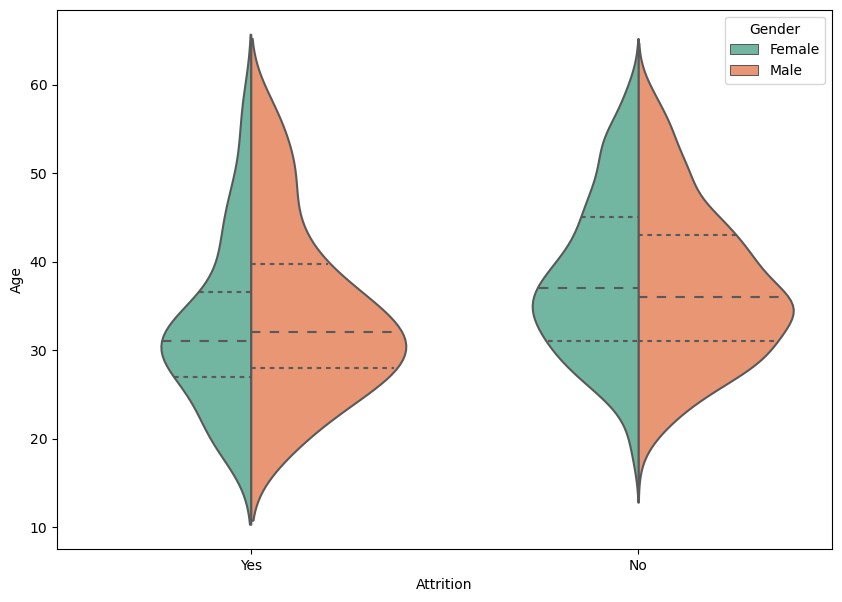

In [25]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we see that the Attrition counts both in male and female are high when the are in their mid 20's and 30's of age.

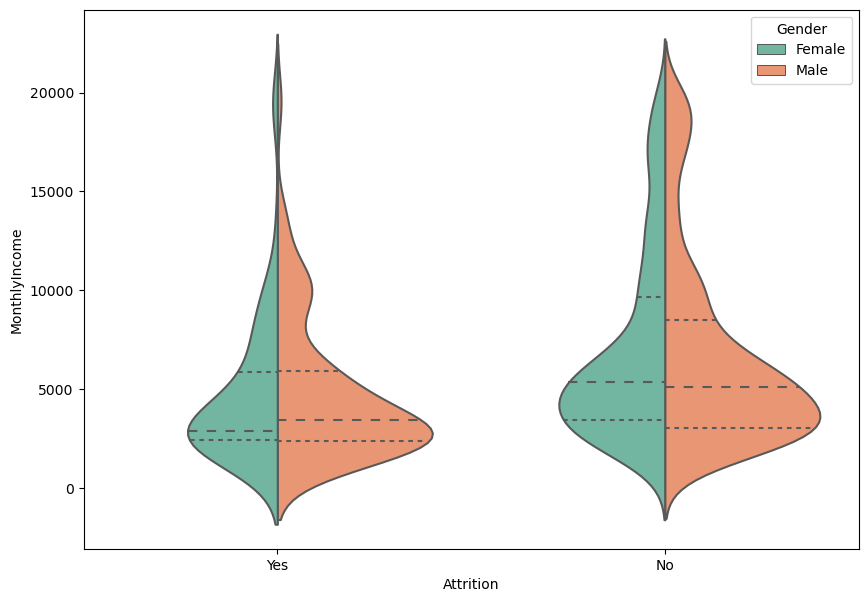

In [26]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above plot we can see that the Attrition peaks for both male and female employees when the monthly income is less than 5000.

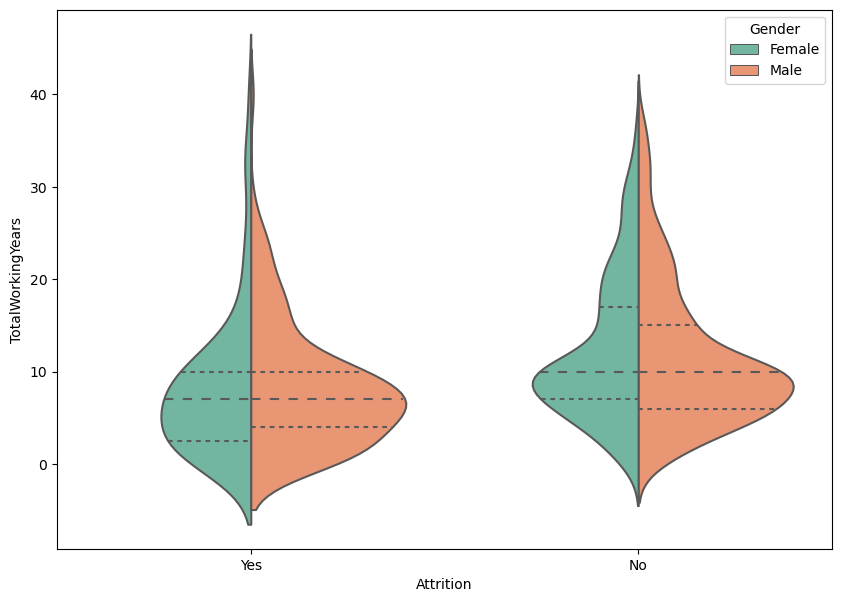

In [27]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we notice that the Attrition for both male and female employees occur when they are in their experience range of 1-10 years.

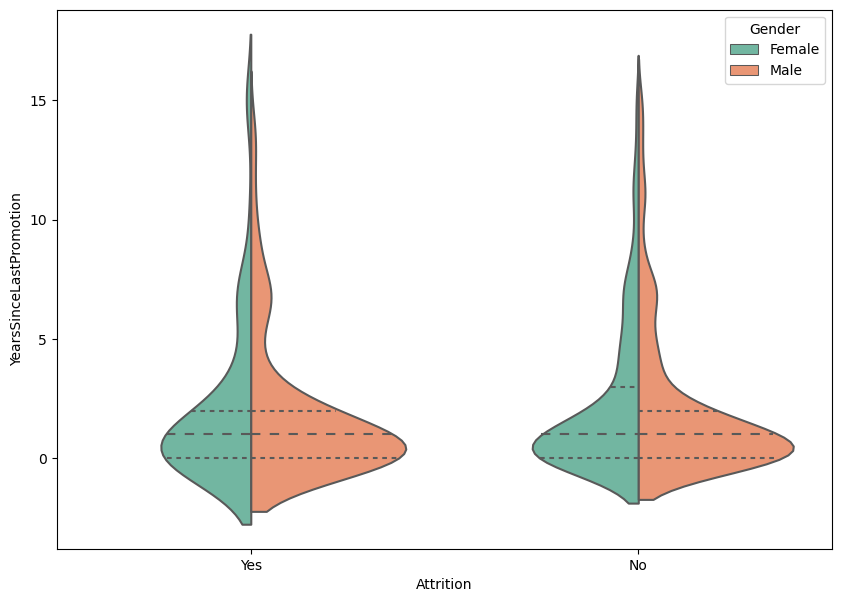

In [28]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above plot we see that the Attrition for both make and female employees happen when they do not see prootions happening after years of gaining experience.

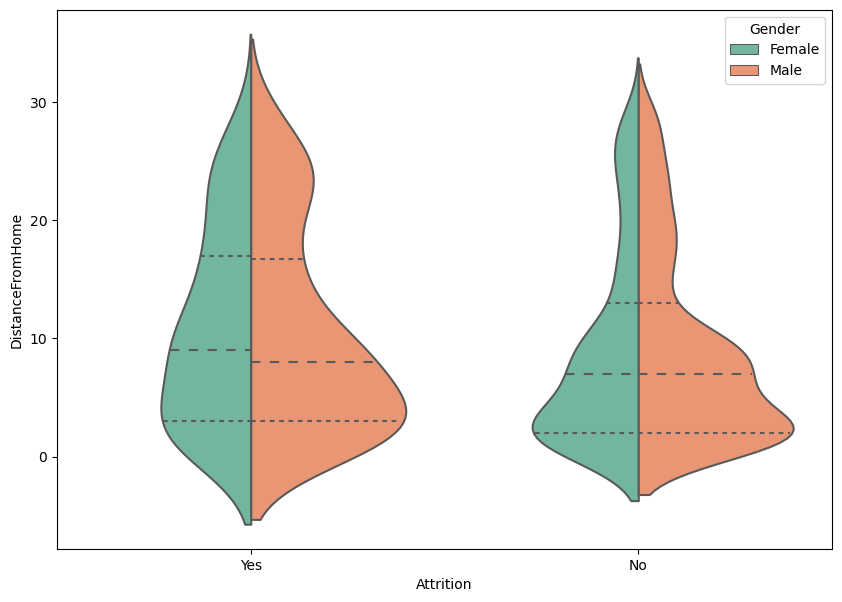

In [29]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="DistanceFromHome", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we notice that the Attrition for both male and female employees occur when their home are 10 km far away from office.

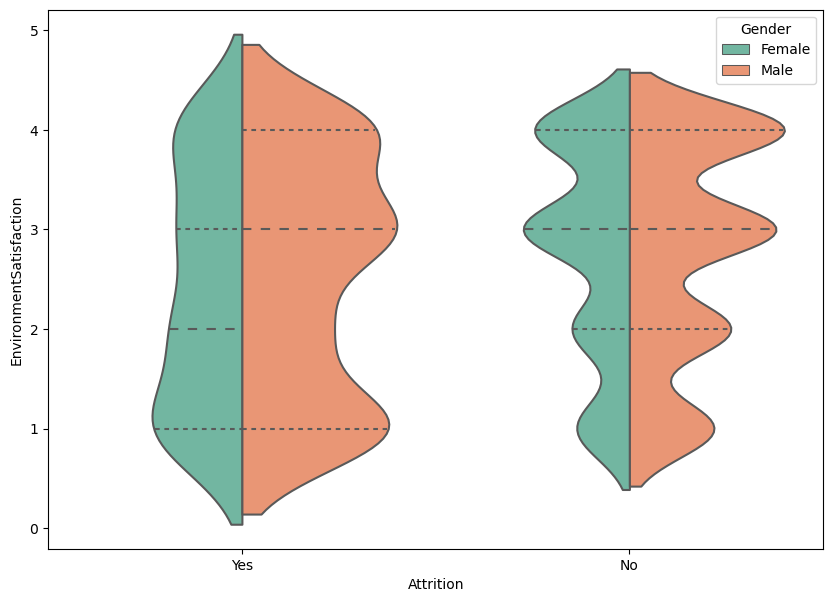

In [30]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="EnvironmentSatisfaction", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()
 

In the above violin plot we notice that the Attrition for both male ad female employees occur when they are less satisfy with the working environment.

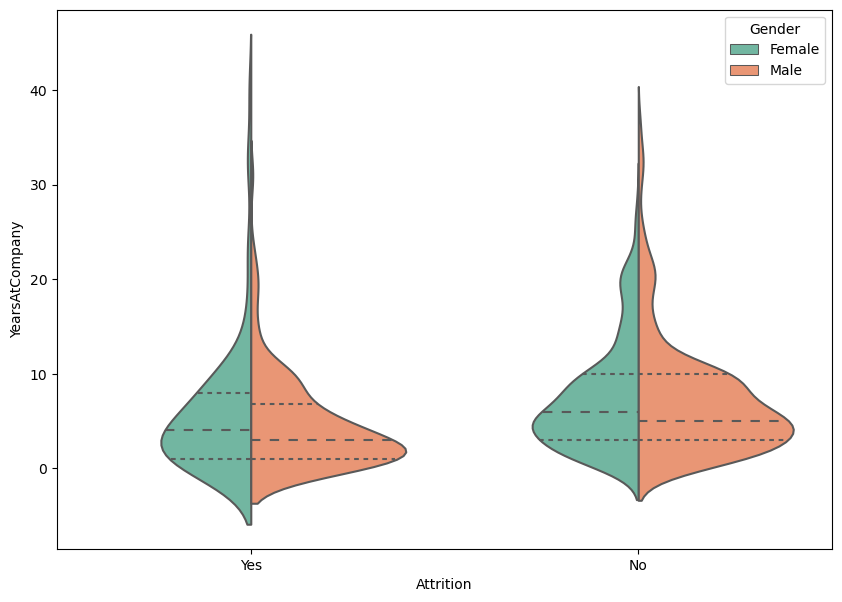

In [31]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="YearsAtCompany", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we notice that the Attrition for both male ad female employees occur when they are new in a company around less the 8 years.

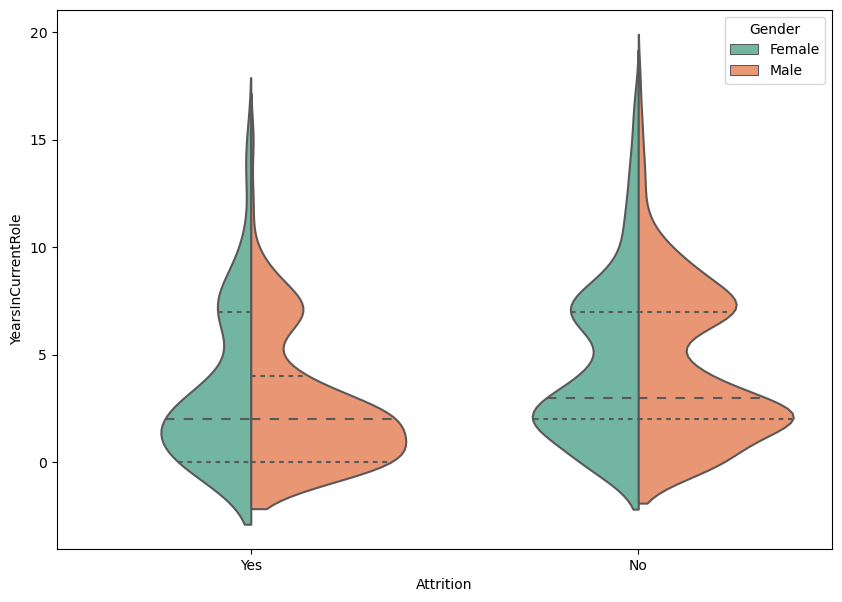

In [32]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="YearsInCurrentRole", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we notice that the Attrition for both male ad female employees occur when they are in their current role for less than 5 years.

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [35]:
# importing all other required libraries
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\sarth\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [36]:
# Label Encoder

le = LabelEncoder()
le.fit(df["Attrition"])
le.classes_
pd.Series(le.transform(df["Attrition"])).head()

0    1
1    0
2    1
3    0
4    0
dtype: int32

I am using Label Encoder on our target column since we want our labels to be converted from the object datatype to numerical datatype.

In [37]:
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


We can see that our target label has been successfully updated into numerical format containing binary values of 0 and 1 where 1 shows Attrition Yes and 0 shows Attrition No.

In [38]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['BusinessTravel'] = oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department'] = oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField'] = oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole'] = oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus'] = oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime'] = oe.fit_transform(df['OverTime'].values.reshape(-1,1))

I am using the Ordinal Encoder to convert all the categorical feature columns from object datatype to integer datatype.

In [39]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


In the above dataframe we can clearly see that all our object datatype columns are now converted to numerical datatype which can be used in our machine learning models.

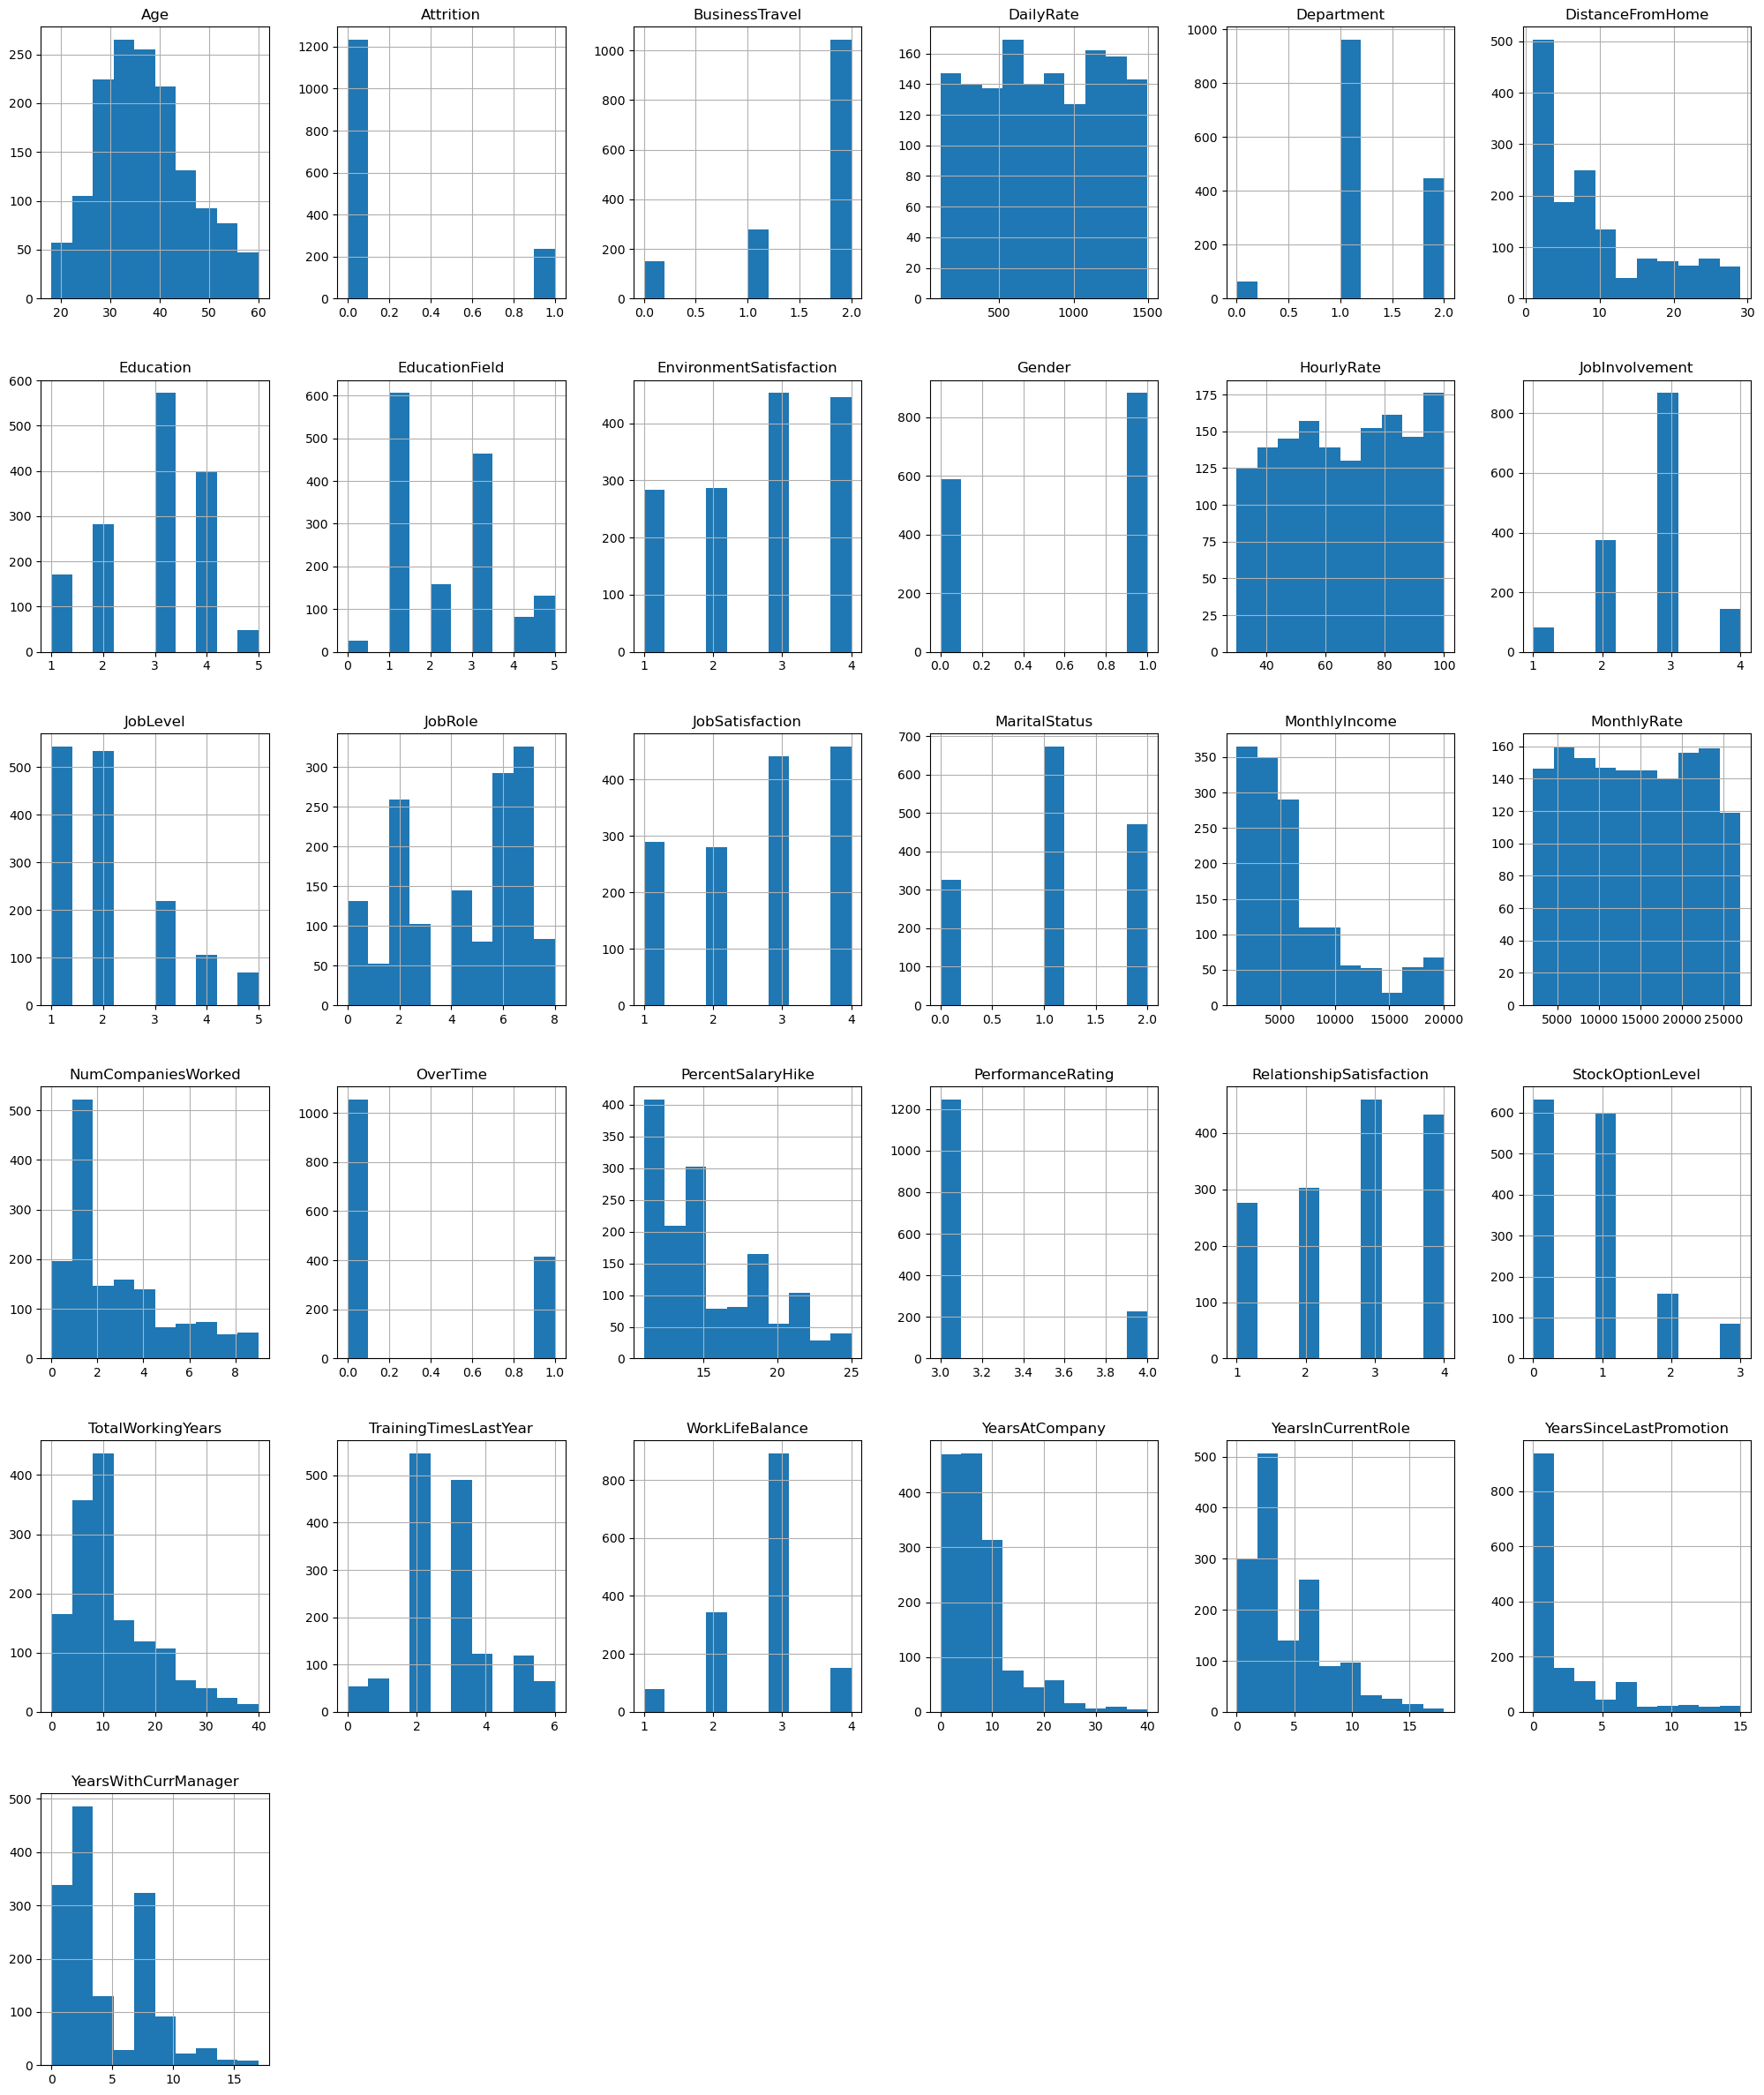

In [40]:
df.hist(figsize=(25,30))
plt.show()

Using the above histogram we are able to plot all the columns of are dataset post application of encoding technique where we do not have any object datatype columns anymore.

# Correlation using a Heatmap

- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

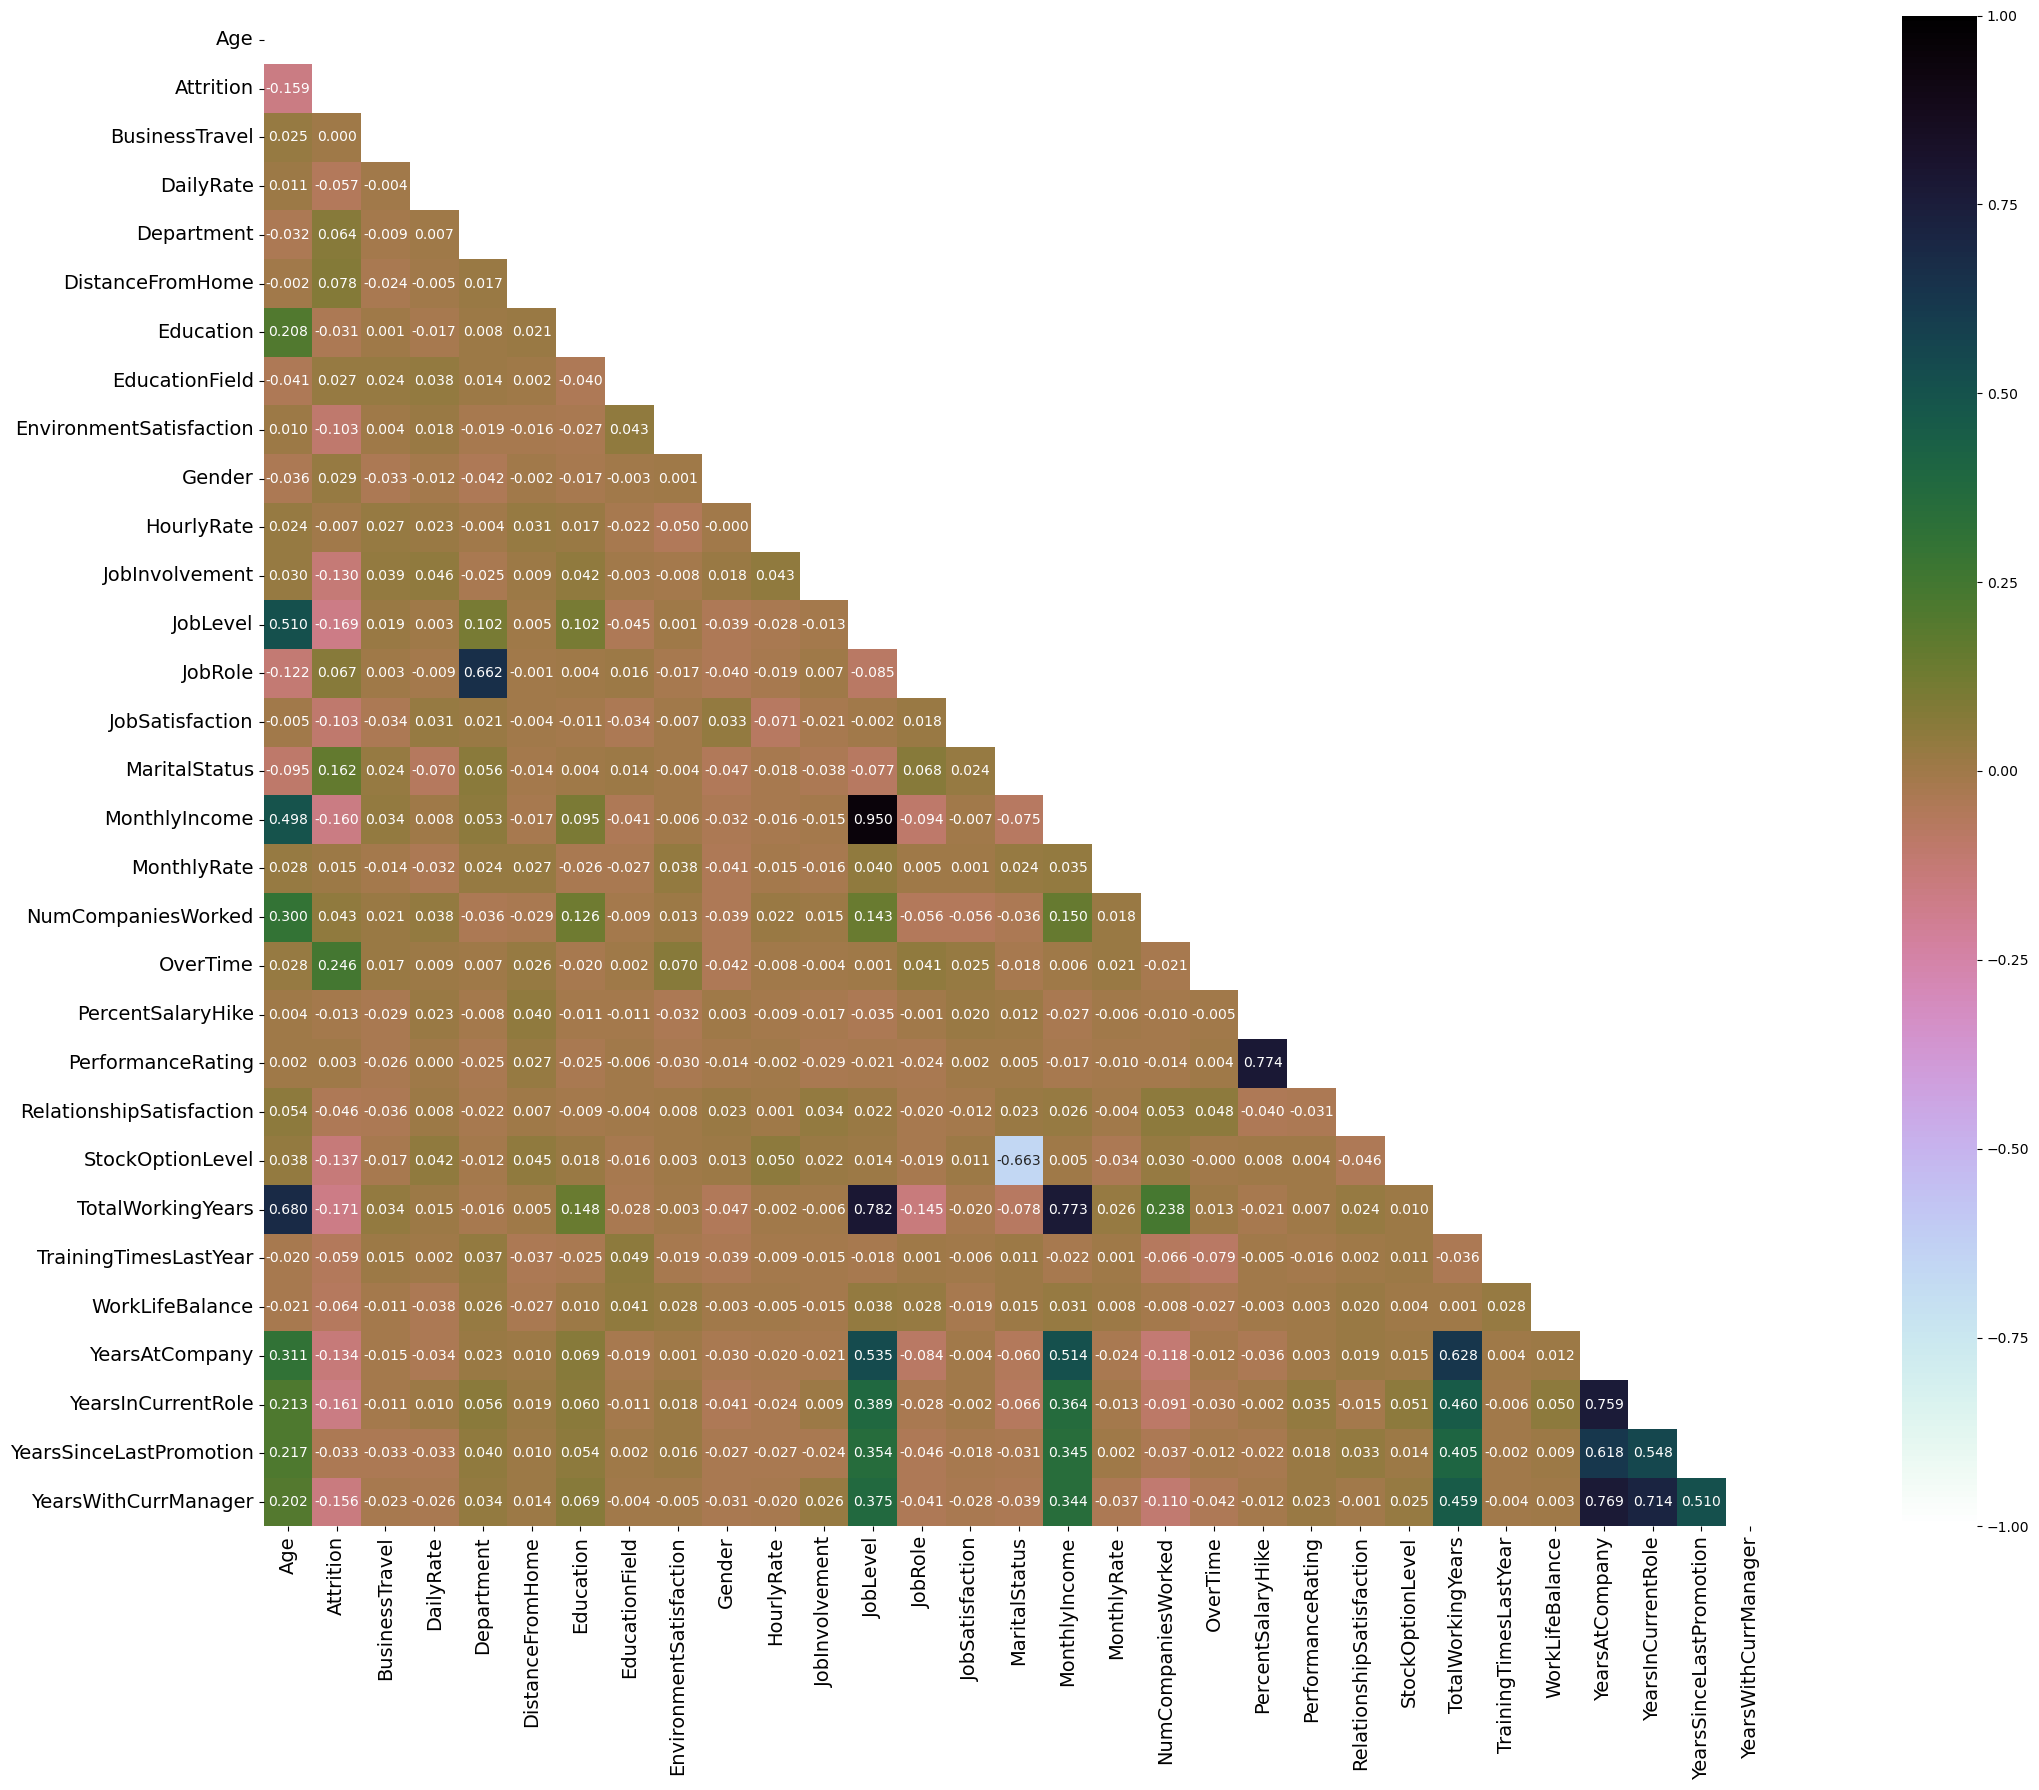

In [41]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(26,18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix_r", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In the above heatmap we can see that our target label "Attrition" has both positive and negative correlations with the feature columns. Also we see very less or negligible amount of multi colinearity so we will not have to worry about it. Since the one's which are reflecting the value are inter dependent on those feature columns and I intend to retain and keep them.

# Using Z Score to remove outliers

- if any data points having z-score above +3 or below -3 are treated as outliers.
- So we remove the data points having z-score above +3 or below -3.

In [42]:
z = np.abs(zscore(df))
threshlod = 3
df1 = df[(z<3).all(axis=1)]
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)
df = df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


I have used the Z score method to remove the outliers since the IQR method was making me lose 5.6 percent of data which I could not have afforded to lose.

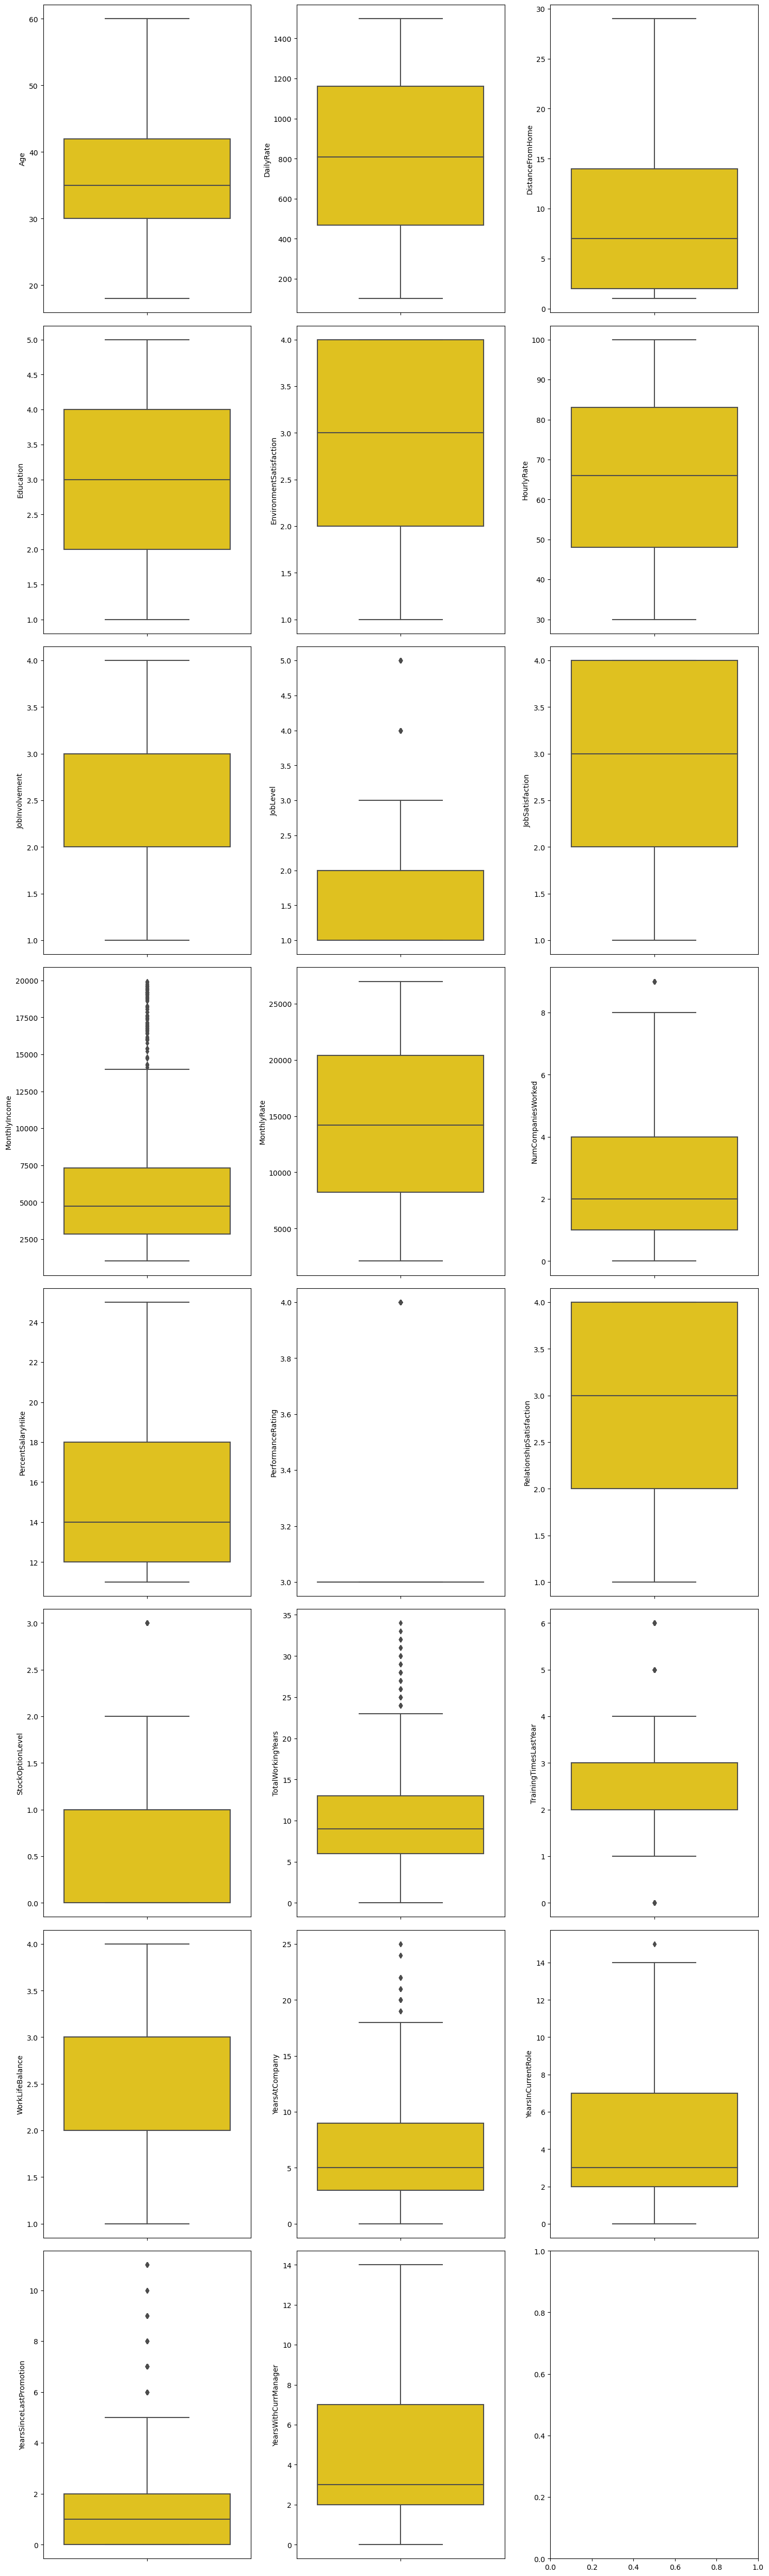

In [43]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[int_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="prism")
    index += 1
plt.tight_layout()
plt.show()

In the above box plot we can see that whatever outliers we could have afforded to lose from our numerical columns we have gotten rid of it. There are still presence of outliers but since they are in continous format we shall ignore it.

In [44]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

# Using Log Transform to fix skewness

It makes our skewed original data more normal. It improves linearity between our dependent and independent variables.

In [45]:
if col in int_datatype:
    if df.skew().loc[col]>0.5:
        df[col] = np.log1p(df[col])

I have applied Log Transformation on our numerical integer datatype columns to ensure that we do not have skewness in our dataset.

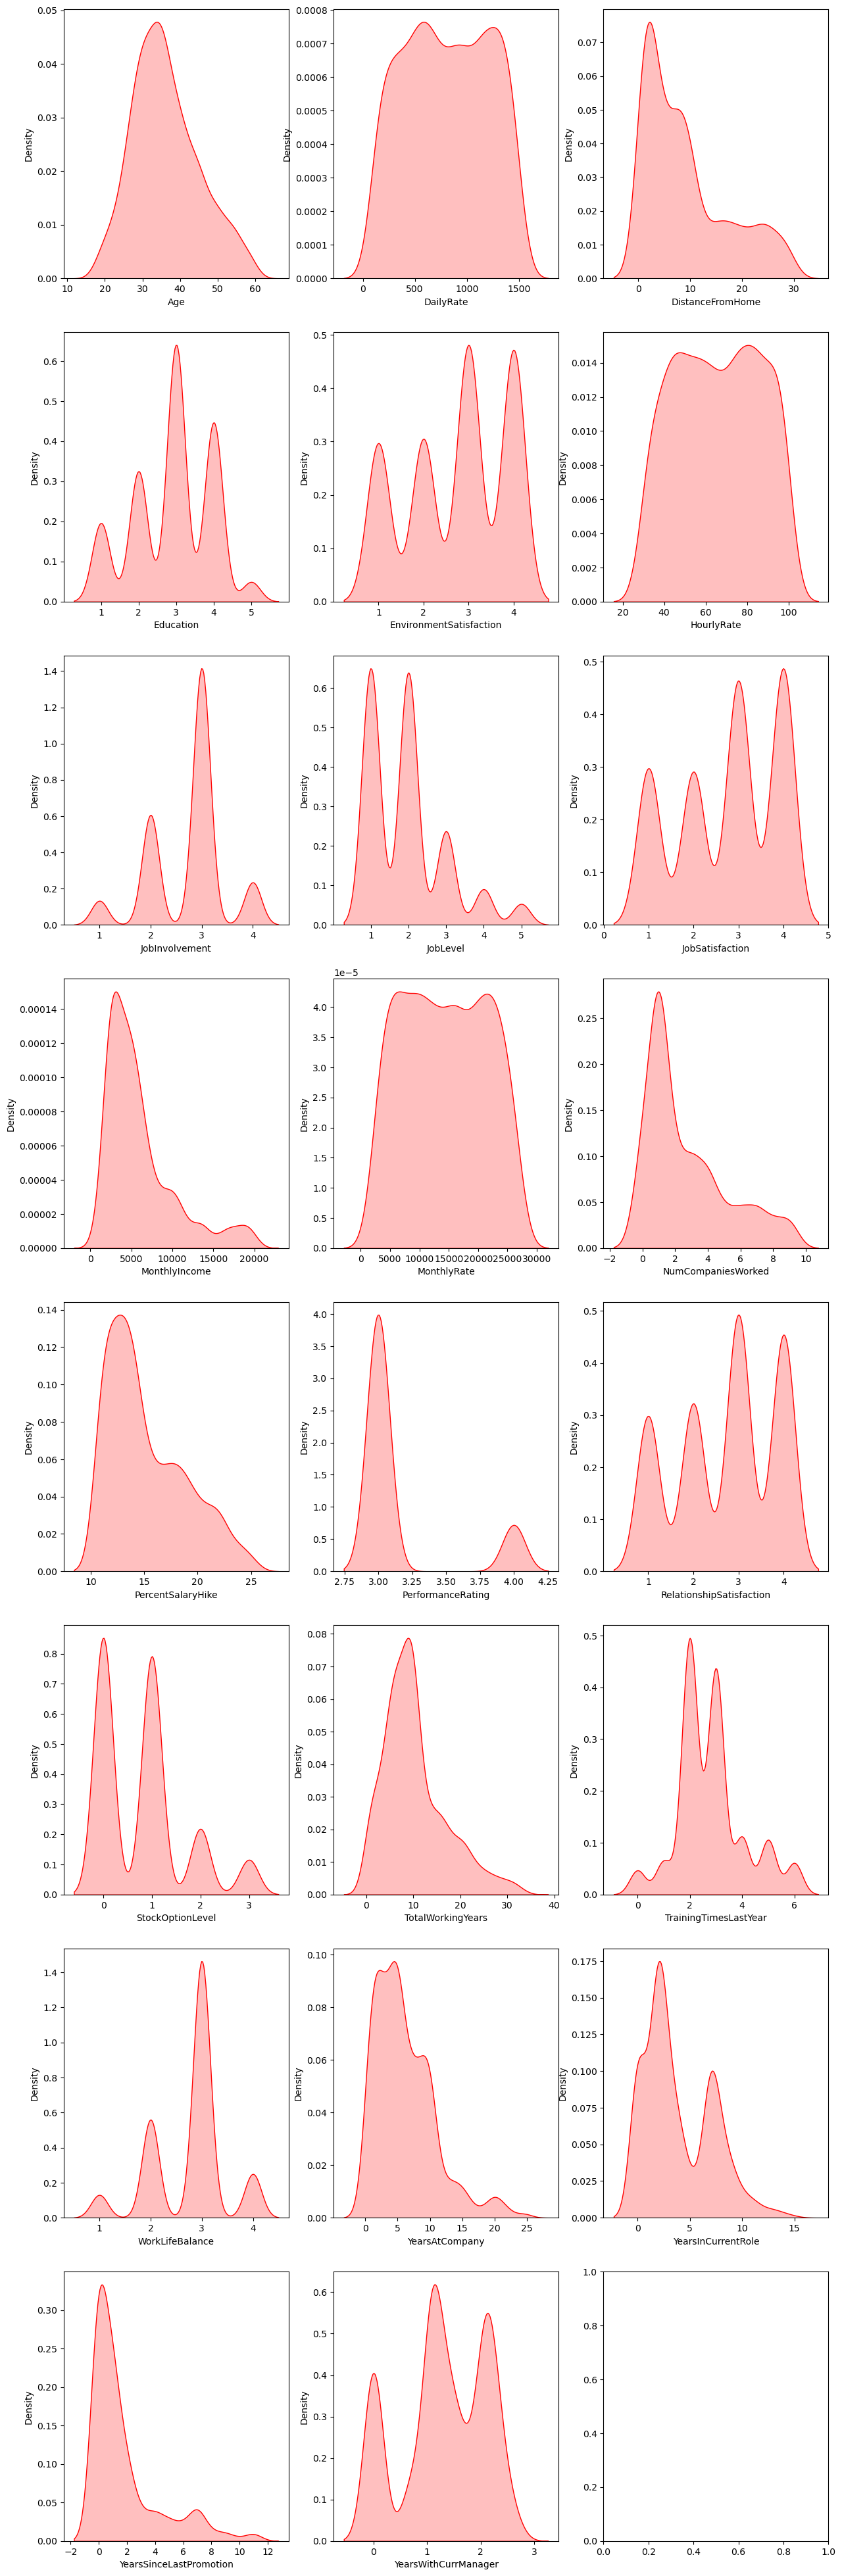

In [46]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[int_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

We have managed to reduce the skewness from our numerical columns and that can be seen in the above distribution plot as well.

# Modelling

# Split the datasets into two variables X and Y.

In [47]:
Y = df['Attrition']
X = df.drop('Attrition', axis=1)

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Resolving the class imbalance issue in label column

In [48]:
Y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [49]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [50]:
Y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

# Feature Scaling

In [51]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.709969,0.675858,0.839015,1.396654,-1.121527,-0.737625,-1.012315,-0.413381,-1.341312,1.513571,...,-0.331250,-1.421568,-0.755154,-0.150173,-2.167340,-2.213544,0.194479,0.269629,-0.686134,0.826523
1,1.632754,-0.996928,-1.324932,-0.573804,-0.211279,-1.756921,-1.012315,0.513425,0.855579,-0.240952,...,3.018864,1.443838,0.494980,0.168035,0.323756,0.544900,1.129430,1.274661,-0.248249,1.198806
2,0.248576,0.675858,1.551566,-0.573804,-0.991491,-0.737625,1.357725,1.440231,0.855579,1.407236,...,-0.331250,-0.466433,-0.755154,-0.309277,0.323756,0.544900,-1.207948,-1.070414,-0.686134,-1.492154
3,-0.212816,-0.996928,1.601523,-0.573804,-0.861456,1.300967,-1.012315,1.440231,-1.341312,-0.506789,...,-0.331250,0.488703,-0.755154,-0.150173,0.323756,0.544900,0.661954,1.274661,0.627522,-1.492154
4,-0.904905,0.675858,-0.504578,-0.573804,-0.991491,-1.756921,0.567712,-1.340187,0.855579,-1.357466,...,-0.331250,1.443838,0.494980,-0.468381,0.323756,0.544900,-0.740473,-0.400393,0.189637,-0.070464


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# # Finding best random state for building logistic Regression Models

In [52]:
maxAccu = 0
maxRS = 0

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test,pred))*100
    
    if acc_score>maxAccu:
        maxAccu = acc_score
        maxRS = i
print("Best accuracy score is",maxAccu,"on random state",maxRS)

Best accuracy score is 88.60103626943005 on random state 939


# Creating the training and testing data sets

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state=827)

I am taking 25 percent of the complete dataset for training purpose and the remaing 75 percent with be used to train the machine learning models using the random state as 827.

# Machine Learning Model for Classification with Evaluation Metrics

In [54]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=827)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [55]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 87.39205526770294

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       293
           1       0.89      0.85      0.87       286

    accuracy                           0.87       579
   macro avg       0.88      0.87      0.87       579
weighted avg       0.87      0.87      0.87       579

Cross Validation Score: 83.7699225441275

Accuracy Score - Cross Validation Score is 3.6221327235754472


Created the Logistic Regression Model and checked for it's evaluation metrics.

In [56]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 92.2279792746114

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       293
           1       0.94      0.90      0.92       286

    accuracy                           0.92       579
   macro avg       0.92      0.92      0.92       579
weighted avg       0.92      0.92      0.92       579

Cross Validation Score: 90.33672823415506

Accuracy Score - Cross Validation Score is 1.8912510404563392


Created the Support Vector Classifier Model and checked for it's evaluation metrics.

In [57]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 85.66493955094991

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       293
           1       0.83      0.88      0.86       286

    accuracy                           0.86       579
   macro avg       0.86      0.86      0.86       579
weighted avg       0.86      0.86      0.86       579

Cross Validation Score: 85.24130483354435

Accuracy Score - Cross Validation Score is 0.42363471740556236


Created the Decision Tree Classifier Model and checked for it's evaluation metrics.

In [58]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 94.12780656303973

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       293
           1       0.97      0.91      0.94       286

    accuracy                           0.94       579
   macro avg       0.94      0.94      0.94       579
weighted avg       0.94      0.94      0.94       579

Cross Validation Score: 91.84925895583525

Accuracy Score - Cross Validation Score is 2.278547607204473


Created the Random Forest Classifier Model and checked for it's evaluation metrics.

In [59]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 83.93782383419689

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82       293
           1       0.77      0.97      0.86       286

    accuracy                           0.84       579
   macro avg       0.86      0.84      0.84       579
weighted avg       0.86      0.84      0.84       579

Cross Validation Score: 81.0899679749758

Accuracy Score - Cross Validation Score is 2.8478558592210845


Created the K Neighbors Classifier Model and checked for it's evaluation metrics.

In [60]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 94.47322970639033

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       293
           1       0.96      0.93      0.94       286

    accuracy                           0.94       579
   macro avg       0.95      0.94      0.94       579
weighted avg       0.95      0.94      0.94       579

Cross Validation Score: 93.7453451999702

Accuracy Score - Cross Validation Score is 0.7278845064201249


Created the Extra Trees Classifier Model and checked for it's evaluation metrics.

# Hyper parameter tuning on the best Classification ML Model

In [61]:
# Choosing Decision Tree Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759]
             }

After comparing all the regression models I have selected Decision Tree Classifier as my best model and have listed down it's parameters above referring the sklearn webpage

In [62]:
GSCV = GridSearchCV(DecisionTreeClassifier(), fmod_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [63]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759],
                         'splitter': ['best', 'random']})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes

In [64]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 2,
 'random_state': 759,
 'splitter': 'random'}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model

In [65]:
GSCV.best_score_

0.8457252641690683

Here the Grid Search CV has provided me with the best score details.

In [66]:
Final_Model = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=4, 
                                     random_state=42, splitter="best")
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 86.35578583765113


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# AUC ROC Curve

In [67]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

# Confusion Matrix

In [68]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

In [69]:
from IPython.display import Image
Image(url="https://t4.ftcdn.net/jpg/05/05/39/07/360_F_505390776_8ilykzGiVSpIjUqdEXFhDY1ACRJZPDRD.jpg")